# Notebook content sequence
    1) Datasets into dataframe
    2) Cleansing
    3) Analysis on data cleansing (visualizations)
        i) Wisconsin (Diagnostic) = dfwd
        ii) Wisconsin (Original) = dfw
        iii) Coimbra = dfwc
    4) Model running without any feature selection & Comparison
        i) Wisconsin (Diagnostic) = 
        ii) Wisconsin (Original) = 
        iii) Coimbra = 
    5) Feature Selection
        i) Correlation with p-value
            a) Wisconsin (Diagnostic) = 
            b) Wisconsin (Original) = 
            c) Coimbra = 
        ii) RFECV
            a) Wisconsin (Diagnostic) = 
            b) Wisconsin (Original) = 
            c) Coimbra = 
        iii) SelectFdr
            a) Wisconsin (Diagnostic) = 
            b) Wisconsin (Original) = 
            c) Coimbra = 
    6) Intersection of feature sets of all the methods
        i) Wisconsin (Diagnostic) = 
        ii) Wisconsin (Original) = 
        iii) Coimbra =
    7) Run the same model on the intersections & compare
    8) Future Scope: 
        i) Combine the intersections from all three datasets
        ii) Generate data for the resultant featureset
        iii) Run model and compare the results

In [102]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
# correlation
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
# RFE
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

#SelectFdr
from sklearn.feature_selection import SelectFdr, chi2

In [103]:
dfwd = pd.read_csv('Data/breast-cancer-wisconsin-diagnostic.data')

In [104]:
dfwd.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [105]:
dfwd.count();

In [106]:
dfwd[['diagnosis','id']].groupby(['diagnosis']).agg(['count'])

,id
,count
diagnosis,
B,357
M,212


### checking if there are any null values

In [107]:
null_columns=dfwd.columns[dfwd.isnull().any()]
print(dfwd[dfwd.isnull().any(axis=1)][null_columns])

     Unnamed: 32
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
..           ...
539          NaN
540          NaN
541          NaN
542          NaN
543          NaN
544          NaN
545          NaN
546          NaN
547          NaN
548          NaN
549          NaN
550          NaN
551          NaN
552          NaN
553          NaN
554          NaN
555          NaN
556          NaN
557          NaN
558          NaN
559          NaN
560          NaN
561          NaN
562          NaN
563          NaN
564          NaN
565          N

In [108]:
nans = lambda dfwd : dfwd[dfwd.isnull().any(axis=1)] 

In [109]:
print(nans(dfwd))

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M     

In [110]:
del dfwd["Unnamed: 32"]

In [111]:
dfwd.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: i

# Comparison with no feature selection

## a) Wisconsin Diagnostic

In [140]:
result = pd.DataFrame()
result['diagnosis'] = dfwd.iloc[:,1]
data = dfwd.iloc[:,2:-1]                         
label_encoder = LabelEncoder()              
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')    
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.25)      

In [141]:
svc = SVC()
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)

0.6013986013986014


## b) Wisconsin Original

## c) Coimbra

# Feature Selection

## 1) Correlation with p-value

### a) Wisconsin Diagnostic

In [133]:
dfwd_in = dfwd.iloc[:,2:]

In [134]:
dfwd_out = dfwd.iloc[:,1:2]
label_encoder = LabelEncoder()
dfwd_out.iloc[:,0] = label_encoder.fit_transform(dfwd_out.iloc[:,0]).astype('float64')

In [135]:
dfwd_out.iloc[:,0].values;

In [136]:
dfwd_out.count()

diagnosis    569
dtype: int64

In [137]:
dfwd_in.count()

radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64

In [138]:
corr = dfwd_in.corr()

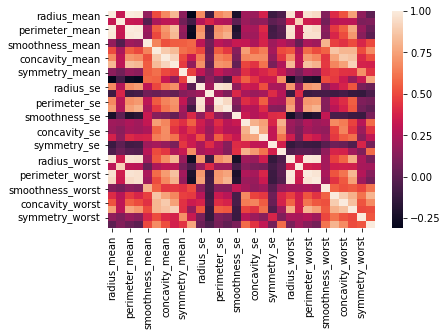

In [139]:
sns.heatmap(corr)

In [21]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = dfwd_in.columns[columns]
dfwd_corr_selected = dfwd_in[selected_columns]

In [129]:
dfwd_corr_selected.iloc[:,0].values;

In [23]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(dfwd_corr_selected.iloc[:,:].values, dfwd_out.iloc[:,0].values, SL, selected_columns)

In [24]:
result = pd.DataFrame()
result['diagnosis'] = dfwd_out.iloc[:,0]

In [27]:
dataset_1_corr = pd.DataFrame(data = data_modeled, columns = selected_columns)

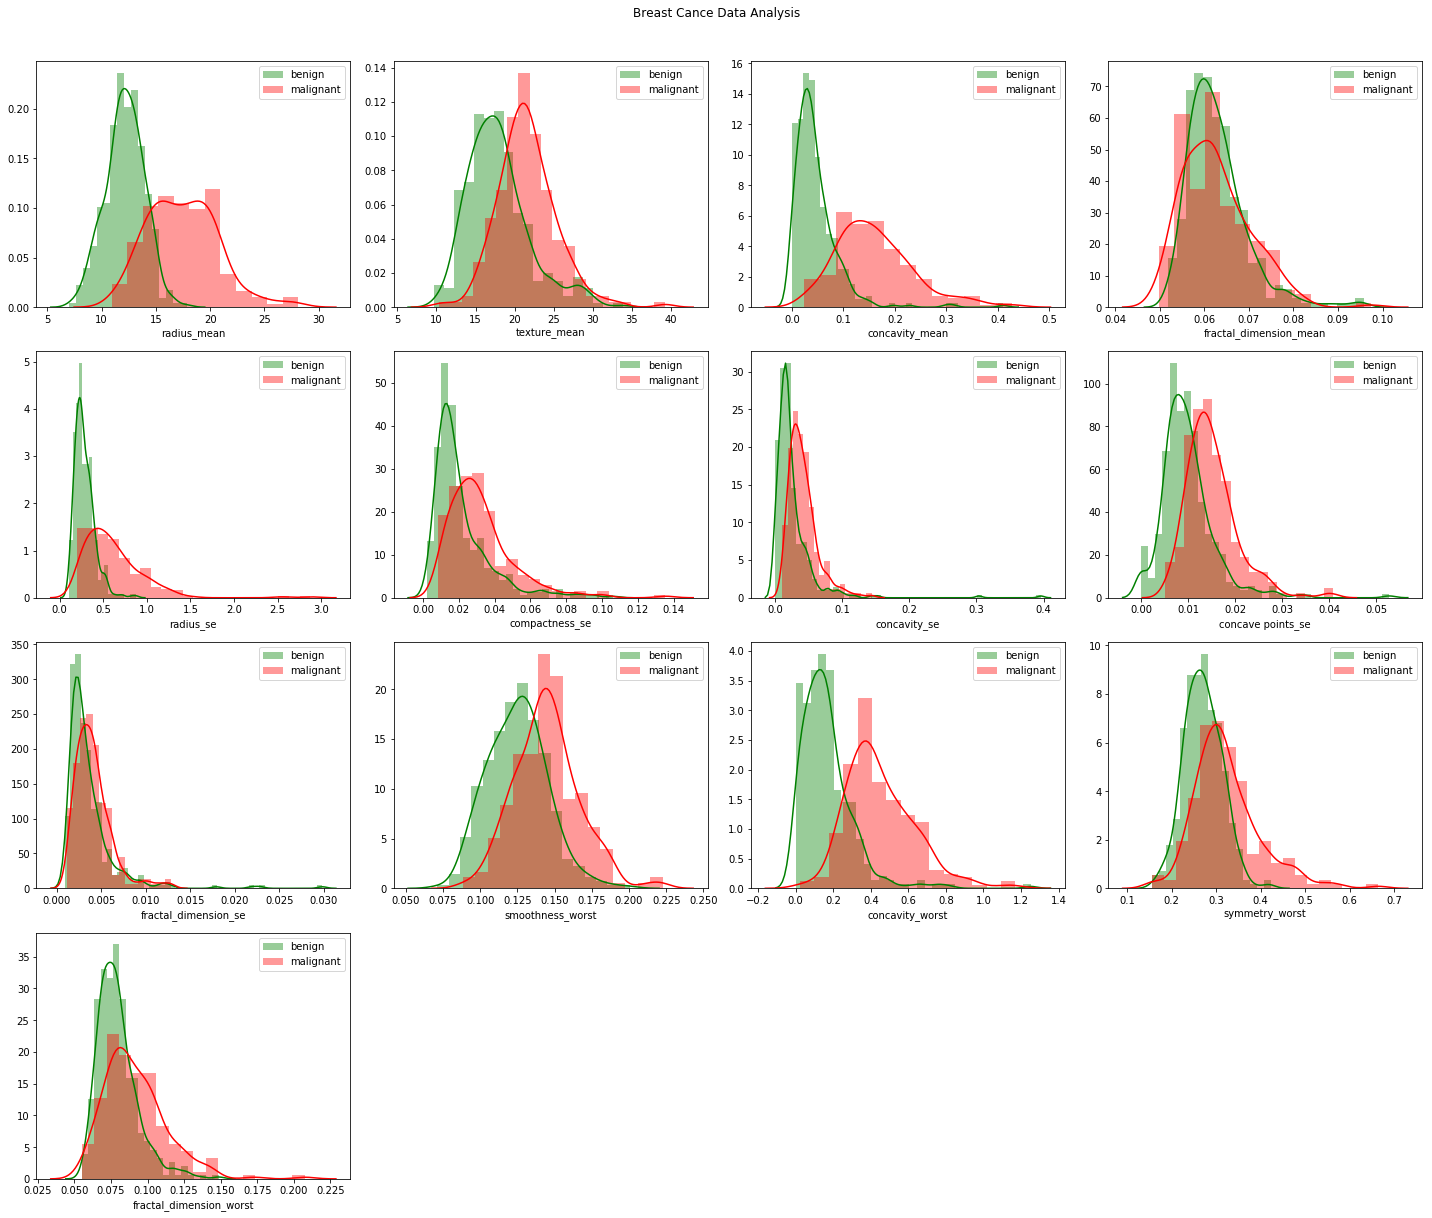

In [29]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in dataset_1_corr.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(dataset_1_corr[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(dataset_1_corr[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(dataset_1_corr.values, result.values, test_size = 0.2)

The default kernel used by SVC is the gaussian kernel

In [31]:
svc=SVC() 
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
prediction = svc.predict(x_test)

In [33]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.9210526315789473


## 2) Recursive Feature Elimination

### a) Wisconsin Diagnostic

In [58]:
dfwd_in;dfwd_out;

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [60]:
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(dfwd_in, dfwd_out)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [61]:
rfecv.score(dfwd_in,dfwd_out)

0.961335676625659

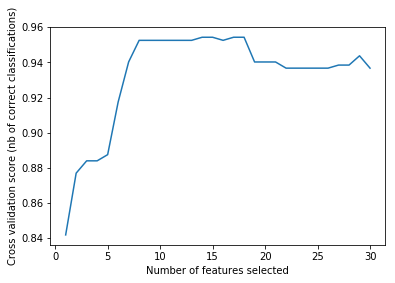

In [62]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [95]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 18


In [64]:
rfecv.ranking_

array([ 1,  4,  1, 13,  1,  1,  1,  1,  1, 10,  8,  1,  1,  5,  6,  2,  1,
        3, 11,  9,  1,  1,  7, 12,  1,  1,  1,  1,  1,  1])

In [98]:
rfecv.support_

array([ True, False,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True])

In [125]:
dfwd_ = rfecv.get_support(indices=True)
print(result_dfwd_selected)  # these are the selected indices

[ 0  2  4  5  6  7  8 11 12 16 20 21 24 25 26 27 28 29]


### b) Wisconsin Original

### c) Coimbra

## 3) SelectFdr

### a) Wisconsin Diagnistic

In [121]:
dfwd_in.shape

(569, 30)

In [122]:
selectFdr = SelectFdr(chi2, alpha=0.01)
selectfdr_result = selectFdr.fit_transform(dfwd_in, dfwd_out)
selectfdr_result.shape

(569, 16)

In [123]:
dfwd_selectfdr_result;

In [124]:
result_dfwd_ = selectFdr.get_support(indices = True)
print(mask)

[ 0  1  2  3  6  7 10 12 13 20 21 22 23 25 26 27]


### b) Wisconsin Original

### c) Coimbra